<a href="https://colab.research.google.com/github/HiimanshuSherawat/Time_series_dart/blob/main/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset

ModuleNotFoundError: ignored

In [2]:
!pip install darts

     |████████████████████████████████| 326 kB 7.7 MB/s 
     |████████████████████████████████| 65 kB 4.7 MB/s 
     |████████████████████████████████| 792 kB 41.2 MB/s 
     |████████████████████████████████| 9.8 MB 38.5 MB/s 
     |████████████████████████████████| 1.4 MB 48.8 MB/s 
     |████████████████████████████████| 165 kB 54.1 MB/s 
     |████████████████████████████████| 11.2 MB 44.1 MB/s 
     |████████████████████████████████| 380 kB 55.4 MB/s 
     |████████████████████████████████| 895 kB 58.1 MB/s 
     |████████████████████████████████| 49 kB 6.5 MB/s 
     |████████████████████████████████| 43 kB 2.7 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6638478 sha256=e3f3e62b2f6211562dc21283498e6d41c40e8a20cf5649be888dab2db92e4681
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels

In [3]:
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset
AirPassengersDataset().load().pd_series()

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Freq: MS, Length: 144, dtype: float64

In [4]:
AirPassengersDataset().load().pd_series()

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Freq: MS, Length: 144, dtype: float64

     |████████████████████████████████| 13.1 MB 7.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nfoursid 1.0.0 requires matplotlib>=3.3, but you have matplotlib 3.1.3 which is incompatible.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
darts 0.16.1 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


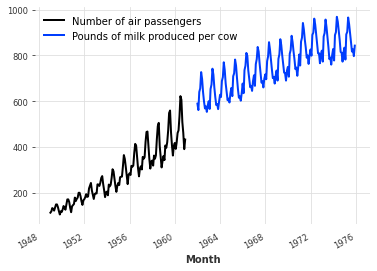

In [7]:
!pip install matplotlib==3.1.3
import matplotlib.pyplot as plt
series_air = AirPassengersDataset().load()
series_milk = MonthlyMilkDataset().load()

series_air.plot(label='Number of air passengers')
series_milk.plot(label='Pounds of milk produced per cow')
plt.legend();

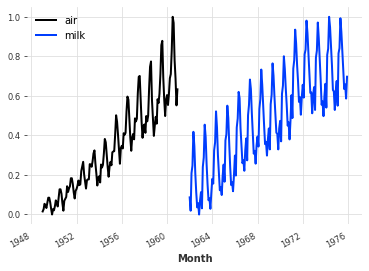

In [8]:
from darts.dataprocessing.transformers import Scaler
scaler_air, scaler_milk = Scaler(), Scaler()
series_air_scaled = scaler_air.fit_transform(series_air)
series_milk_scaled = scaler_milk.fit_transform(series_milk)

series_air_scaled.plot(label='air')
series_milk_scaled.plot(label='milk')
plt.legend();

In [9]:
train_air, val_air = series_air_scaled[:-36], series_air_scaled[-36:]
train_milk, val_milk = series_milk_scaled[:-36], series_milk_scaled[-36:]
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape

In [10]:
model_air_milk = NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=500, random_state=0)

In [11]:
model_air_milk.fit([train_air, train_milk], verbose=True)

[2022-02-11 15:03:02,459] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 194 samples.
[2022-02-11 15:03:02,459] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 194 samples.
[2022-02-11 15:03:02,689] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-11 15:03:02,689] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
  0%|          | 1/500 [00:01<12:21,  1.49s/it]

  2%|▏         | 11/500 [00:14<10:30,  1.29s/it]

  4%|▍         | 21/500 [00:27<10:16,  1.29s/it]

  6%|▌         | 31/500 [00:40<10:02,  1.28s/it]

  8%|▊         | 41/500 [00:52<09:48,  1.28s/it]

 10%|█         | 51/500 [01:05<09:36,  1.28s/it]

 12%|█▏        | 61/500 [01:18<09:27,  1.29s/it]

 14%|█▍        | 71/500 [01:32<10:24,  1.45s/it]

 16%|█▌        | 81/500 [01:45<08:58,  1.29s/it]

 18%|█▊        | 91/500 [01:58<08:50,  1.30s/it]

 20%|██        | 101/500 [02:11<08:36,  1.29s/it]

 22%|██▏       | 111/500 [02:24<08:18,  1.28s/it]

 24%|██▍       | 121/500 [02:37<08:08,  1.29s/it]

 26%|██▌       | 131/500 [02:49<07:54,  1.29s/it]

 28%|██▊       | 141/500 [03:02<07:42,  1.29s/it]

 30%|███       | 151/500 [03:15<07:30,  1.29s/it]

 32%|███▏      | 161/500 [03:28<07:23,  1.31s/it]

 34%|███▍      | 171/500 [03:41<07:08,  1.30s/it]

 36%|███▌      | 181/500 [03:54<06:55,  1.30s/it]

 38%|███▊      | 191/500 [04:07<06:41,  1.30s/it]

 40%|████      | 201/500 [04:20<06:26,  1.29s/it]

 42%|████▏     | 211/500 [04:33<06:12,  1.29s/it]

 44%|████▍     | 221/500 [04:46<06:01,  1.30s/it]

 46%|████▌     | 231/500 [04:59<05:48,  1.30s/it]

 48%|████▊     | 241/500 [05:12<05:35,  1.30s/it]

 50%|█████     | 251/500 [05:25<05:20,  1.29s/it]

 52%|█████▏    | 261/500 [05:38<05:08,  1.29s/it]

 54%|█████▍    | 271/500 [05:51<04:56,  1.30s/it]

 56%|█████▌    | 281/500 [06:04<04:43,  1.29s/it]

 58%|█████▊    | 291/500 [06:17<04:31,  1.30s/it]

 60%|██████    | 301/500 [06:30<04:19,  1.30s/it]

 62%|██████▏   | 311/500 [06:43<04:04,  1.29s/it]

 64%|██████▍   | 321/500 [06:56<03:51,  1.29s/it]

 66%|██████▌   | 331/500 [07:09<03:39,  1.30s/it]

 68%|██████▊   | 341/500 [07:22<03:24,  1.29s/it]

 70%|███████   | 351/500 [07:35<03:12,  1.29s/it]

 72%|███████▏  | 361/500 [07:49<03:17,  1.42s/it]

 74%|███████▍  | 371/500 [08:02<02:48,  1.30s/it]

 76%|███████▌  | 381/500 [08:14<02:34,  1.29s/it]

 78%|███████▊  | 391/500 [08:27<02:21,  1.30s/it]

 80%|████████  | 401/500 [08:40<02:07,  1.29s/it]

 82%|████████▏ | 411/500 [08:53<01:55,  1.30s/it]

 84%|████████▍ | 421/500 [09:06<01:41,  1.29s/it]

 86%|████████▌ | 431/500 [09:19<01:29,  1.30s/it]

 88%|████████▊ | 441/500 [09:32<01:16,  1.30s/it]

 90%|█████████ | 451/500 [09:45<01:03,  1.30s/it]

 92%|█████████▏| 461/500 [09:58<00:50,  1.30s/it]

 94%|█████████▍| 471/500 [10:11<00:37,  1.30s/it]

 96%|█████████▌| 481/500 [10:24<00:24,  1.30s/it]

 98%|█████████▊| 491/500 [10:37<00:11,  1.30s/it]

100%|██████████| 500/500 [10:50<00:00,  1.30s/it]


MAPE = 8.90%


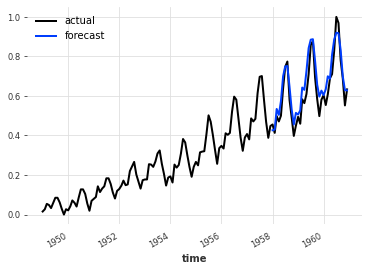

In [12]:
pred = model_air_milk.predict(n=36, series=train_air)

series_air_scaled.plot(label='actual')
pred.plot(label='forecast')
plt.legend();
print('MAPE = {:.2f}%'.format(mape(series_air_scaled, pred)))

MAPE = 11.41%


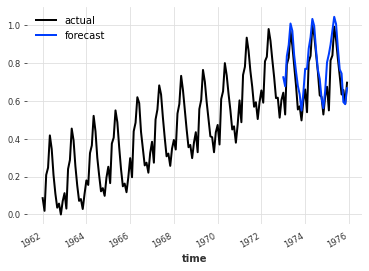

In [13]:
pred = model_air_milk.predict(n=36, series=train_milk)

series_milk_scaled.plot(label='actual')
pred.plot(label='forecast')
plt.legend();
print('MAPE = {:.2f}%'.format(mape(series_milk_scaled, pred)))